# 9주차 PCA 실습 과제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']='Malgun Gothic'

In [2]:
df = pd.read_csv('../data/test_encoded.csv')
df.head(); df.shape

(49342, 200)

In [3]:
data = df.describe()
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199
count,49342.0,49342.0,49342.000000,49342.000000,49342.000000,49342.000000,49342.0,49342.0,49342.000000,49342.000000,...,49342.0,49342.000000,49342.000000,49342.0,49342.0,49342.0,49342.000000,49342.0,49342.000000,49342.0
mean,0.0,0.0,0.044851,0.000003,0.009691,0.073487,0.0,0.0,0.204180,0.000048,...,0.0,0.206364,0.069424,0.0,0.0,0.0,0.026816,0.0,0.062563,0.0
std,0.0,0.0,0.014367,0.000075,0.007245,0.019082,0.0,0.0,0.038828,0.000770,...,0.0,0.045911,0.018652,0.0,0.0,0.0,0.001716,0.0,0.012844,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,0.011686,0.0,0.0,0.051408,0.000000,...,0.0,0.045183,0.007597,0.0,0.0,0.0,0.024736,0.0,0.013931,0.0
25%,0.0,0.0,0.033544,0.000000,0.002413,0.059733,0.0,0.0,0.177418,0.000000,...,0.0,0.172709,0.055656,0.0,0.0,0.0,0.025265,0.0,0.053352,0.0


In [4]:
data.columns[data.loc['mean'] == 0.0]
drop_col = data.columns[data.loc['mean'] == 0.0]

In [5]:
df.drop(drop_col, axis=1, inplace=True)

In [6]:
df.head()

,feature_2,feature_3,feature_4,feature_5,feature_8,feature_9,feature_12,feature_13,feature_14,feature_16,...,feature_178,feature_179,feature_182,feature_186,feature_187,feature_189,feature_191,feature_192,feature_196,feature_198
0,0.024538,0.0,0.000000,0.045839,0.149685,0.0,0.0,0.023727,0.018861,0.081795,...,0.101320,0.018537,0.015588,0.060163,0.094306,0.096151,0.141402,0.042400,0.028296,0.044551
1,0.058296,0.0,0.017126,0.091006,0.239490,0.0,0.0,0.039279,0.043399,0.147820,...,0.130629,0.012819,0.002677,0.098213,0.154326,0.148402,0.248532,0.086392,0.025259,0.074349
2,0.051791,0.0,0.012360,0.083106,0.221741,0.0,0.0,0.036379,0.038226,0.135294,...,0.125043,0.014220,0.004739,0.091841,0.142696,0.138763,0.227867,0.078469,0.025879,0.069934
3,0.038092,0.0,0.004549,0.065755,0.189635,0.0,0.0,0.030054,0.030274,0.110639,...,0.114026,0.016397,0.007270,0.075772,0.119290,0.119913,0.187429,0.061617,0.028196,0.057663
4,0.040451,0.0,0.006021,0.069720,0.194577,0.0,0.0,0.030567,0.031339,0.114534,...,0.116369,0.015864,0.006971,0.079564,0.123910,0.122028,0.194506,0.064851,0.027344,0.060139


In [7]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df) # 평균조정된 X

In [8]:
X_scaled.mean(0)
X_scaled.std(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

Text(0, 0.5, '총변동량 누적 설명 비율')

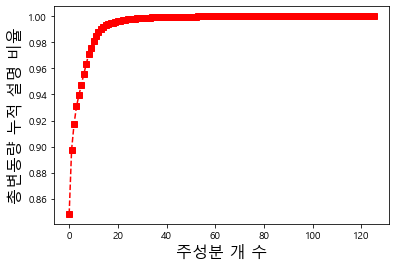

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16'); plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

Text(0, 0.5, '총변동량 누적 설명 비율')

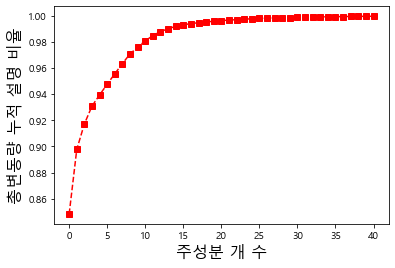

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_[0:41]), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16'); plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

In [11]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(X_scaled)
print('총변동량 설명비율 (%) :', np.round(pca.explained_variance_ratio_*100, 2))

총변동량 설명비율 (%) : [84.84  4.93  1.95  1.37  0.85]


In [12]:
print(f'표준화된 자료의 총변동량은 : {np.trace(X_scaled.T@X_scaled)}')
print(f'5개 PCA 자료의 총변동량은 : {np.trace(x_pca.T@x_pca)}')
print(f'PCA가 표준화된 원자료의 총변동량 설명비율은 : {np.trace(x_pca.T@x_pca)/np.trace(X_scaled.T@X_scaled)}')
np.round(pca.explained_variance_ratio_*100, 2).sum()

표준화된 자료의 총변동량은 : 6217092.0
5개 PCA 자료의 총변동량은 : 5839942.133605398
PCA가 표준화된 원자료의 총변동량 설명비율은 : 0.9393366116514599


93.94000000000001

# End

In [13]:
X_scaled = pd.DataFrame(X_scaled).sample(frac=0.2)

In [14]:
%time PCA(n_components=2).fit_transform(X_scaled)

Wall time: 64.8 ms


array([[-11.16862273,   1.09401278],
       [-10.79807018,   1.04965077],
       [  5.39002762,  -1.50072544],
       ...,
       [-13.62274614,   2.03989964],
       [ 18.65556716,   0.13305339],
       [ -7.79730186,   0.29602335]])

In [15]:
from sklearn.manifold import LocallyLinearEmbedding
%time LocallyLinearEmbedding(n_components=2).fit_transform(X_scaled)

Wall time: 16.1 s


array([[ 0.00015486,  0.01042511],
       [ 0.00015487,  0.01042514],
       [ 0.0001559 ,  0.01042809],
       ...,
       [-0.00034749,  0.00064869],
       [ 0.00015593,  0.01042819],
       [ 0.00015573,  0.01042761]])

In [16]:
from sklearn.manifold import TSNE
%time TSNE(n_components=2).fit_transform(X_scaled)

Wall time: 41.8 s


array([[ -4.954683 ,  13.079131 ],
       [-33.398537 ,   1.0780765],
       [ 33.2454   , -30.499859 ],
       ...,
       [ 33.104538 ,  71.52417  ],
       [-21.63971  , -18.750227 ],
       [-72.592575 ,   2.918747 ]], dtype=float32)

In [17]:
from sklearn.manifold import MDS
%time MDS(n_components=3).fit_transform(x_pca)

MemoryError: Unable to allocate 18.1 GiB for an array with shape (49342, 49342) and data type float64